<img src="popcorn.jpg" alt="movie" />

# Phase 1 Project
**Author: Nobert Akwir Ogwel**

# Overview
This Project analyzes movies datasets from various movie rating sites (through Exploratory Data Analysis), to assist the head of Microsoft's new movies studio in deciding what type of films to create under their new venture.
___

# Business Backround
Microsoft is an American multinational computer technology corporation, started in 1975. Its main business was in developing, licensing, and supporting a range of software products and services catering to different requirements. Its big break through came when a partnership was formed with IBM, which resulted in microsoft providing a crucial operating system for IBM PCs.
Since then, they have been providing operating systems for most of the PC's, at all consumer levels.They also entered the gaming and mobile phone market (i.e Xbox and windows mobile OS) and were succesful in capturing a large market share. They have also ventured into the videotelephony market with the aqcuisition of Skype and recently moved into cloud computing with Windows Azure Platform. 
___

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but have no clue on how to create movies that'll do good in the boxoffice. We therefore are tasked with exploring what types of films are currently doing the best at the box office then translate our findings into actionable insights that will help the head of the new movie studio, decide what films to create.
>**We are going to answer 3 Business problem questions:**\
        **1. Which types of movies should Microsoft create from their new studio?**\
        **2. Where should they focus(market) in terms of directing the resourses in order to get more return(gross revenue)?**\
        **3. How Long should their movies be in order to satsfy their audiences?**
___

# Data Understanding
Movie rating sites have the longest running datasets of movie ratings and performance. we will focus on IMDB datasets on movies titles and ratings and also look at Box office Mojo's movies gross revenue dataset.

In [39]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
import seaborn as sns

In [40]:
#loading imdb movie titles datsets
imdb_titles = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
#loading imdb movie rating dataset
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [43]:
#concise summary of the imdb_titles datset.
imdb_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


>**From above information, we can see that the imdb_titles dataset has 146144 rows and 6 columns. The original_title, runtime_minutes and genres columns have null values. The datatypes of the columns are okay, we may not need to cahnge any of them later.**

In [52]:
#total number of null values for each column containing null values in the imdb_titles dataset.
columns = ['original_title','runtime_minutes','genres']
for column in columns:
    print(f'{column} has {imdb_titles[column].isna().sum()} null values, {(imdb_titles[column].isna().sum())/146144*100}% of the column')

original_title has 21 null values, 0.014369389095686446% of the column
runtime_minutes has 31739 null values, 21.71762097657105% of the column
genres has 5408 null values, 3.7004598204510617% of the column


In [45]:
#concise summary of the imdb_ratings datset.
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


>**From above information, we can see that the imdb_ratings dataset has 73856 rows and 3 columns. None of the columns have null values. The datatypes of the columns are okay, we may not need to cahnge any of them later.**
______

# Data Cleaning
Dealing with:
* Duplicated entries.
* Missing/ Null values.
* Outliers.

## Dealing with duplicated entries

In [59]:
#Checking for ducplicate entries from both datasets.
print(f'imdb_titles dataset has {imdb_titles.duplicated().sum()} duplicated entries.')
print(f'imdb_ratings dataset has {imdb_ratings.duplicated().sum()} duplicated entries.')

imdb_titles dataset has 0 duplicated entries.
imdb_ratings dataset has 0 duplicated entries.


>**We see that both imdb_titles and imdb_ratings datasets have no duplicated entries.**

## Dealing with missing values.
Earlier, we got to see that some of the columns in the imdb_titles dataset had columns with null values. These are the original_title, runtime_minutes and genres columns. Since the Datatype of these columns are different, we are going to deal with the missing values differently.

In [61]:
#Checking the datatype of the columns with null values.
for column in columns:
    print(f'{column}: {imdb_titles[column].dtype}')

original_title: object
runtime_minutes: float64
genres: object


* **For the original_title column, we will drop the rows with the null values since its datatype is string/object. This will also not affect the dataset a lot since the proportion of  rows with missing values is very small compared to the overall size of the dataset.**
* **For runtime_minutes column, we will replace the null values with the median value of the subject column. Median is a good choice because it is least likely to influence the distribution of the dataset overally.**
* **Lastly, for the genres column, we will replace the null values with '_Unknown_'.**

In [63]:
#Replacing the null values in the runtime_minutes with the median of the column.
imdb_titles['runtime_minutes'].fillna(imdb_titles['runtime_minutes'].median(), inplace=True)

In [65]:
#Replacing null values in the genres column with string 'Unknown'.
imdb_titles['genres'].fillna('Unknown', inplace=True)

In [67]:
#Dropping rows with null values in the original_title column.
imdb_titles.dropna(inplace=True)

In [70]:
#Viewing the imdb_titles dataset after dealing with null values.
imdb_titles.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
138920,tt8962416,Izeh (Ezeh),Izeh (Ezeh),2019,15.0,Documentary
14455,tt1715819,Jimmy Tingle's American Dream,Jimmy Tingle's American Dream,2010,70.0,"Comedy,Documentary"
111139,tt6490152,SKIN,SKIN,2018,87.0,Drama
34024,tt2262526,Cadenas,Cadenas,2012,60.0,Documentary
114027,tt6732410,Search 4 Scratch,Search 4 Scratch,2017,90.0,Documentary


In [71]:
imdb_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  146123 non-null  float64
 5   genres           146123 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


>**We have been able to deal with all null values in our imdb_titles dataset.**
_____

## Checking for outliers.

In [72]:
#Summary descriptive stats for numerical columns in imdb_
imdb_titles.describe()

,start_year,runtime_minutes
count,146123.000000,146123.000000
mean,2014.621497,86.362811
std,2.733586,147.201913
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,87.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


<AxesSubplot:>

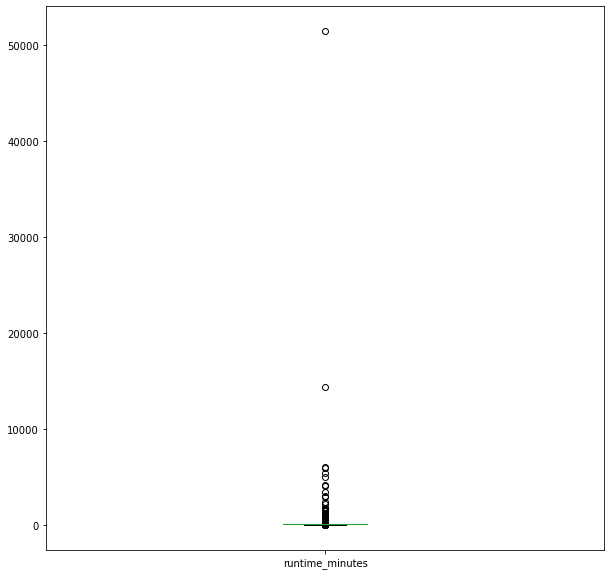

In [77]:
#Boxplot of runtime_minutes column to assist check if there are ouliers in subject column
imdb_titles['runtime_minutes'].plot(kind='box',figsize=(10,10))

>**From above boxplot, we see that clearly there are outliers in our column. But this is expected since some films are ususally very long e.g Documentaries. Therefore we will handle this by binning the colunm to different caegories.**

In [91]:
#Creating a new column where we have binned the movies according to their runtime minutes.
imdb_titles['runtime_min_binned'] = imdb_titles['runtime_minutes'].map(lambda x: 'Short film' if x <= 60.0 else('Feature film' if x <= 210.0 else 'Long film'))
imdb_titles.sample(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_min_binned
32915,tt2234275,Mister Twister: Class of Fun,Mees Kees,2012,80.0,"Comedy,Family",Feature film
71390,tt4077656,Pipe Dream,Pipe Dream,2015,95.0,Comedy,Feature film
34687,tt2282006,Marcianise Terra di Pugili,Marcianise Terra di Pugili,2010,72.0,Documentary,Feature film
22792,tt1934241,DonT Stop,DonT Stop,2012,98.0,"Drama,Music",Feature film
85469,tt4946336,Hunting Season,Hunting Season,2016,83.0,Thriller,Feature film
98270,tt5742304,Bodies,Paramedics,2016,98.0,Horror,Feature film
132886,tt8324474,Hope Aur Hum,Hope Aur Hum,2018,96.0,"Comedy,Drama,Family",Feature film
124765,tt7588904,Nocturnal,Nocturnal,2018,87.0,Thriller,Feature film
54306,tt3194744,Silence,Silence,2013,66.0,Drama,Feature film
63103,tt3624544,Art Party,Art Party,2014,83.0,Drama,Feature film


In [96]:
#value counts for the runtime_min_binned column.
imdb_titles['runtime_min_binned'].value_counts()

Feature film    124114
Short film       21685
Long film          324
Name: runtime_min_binned, dtype: int64

array([<AxesSubplot:ylabel='runtime_min_binned'>], dtype=object)

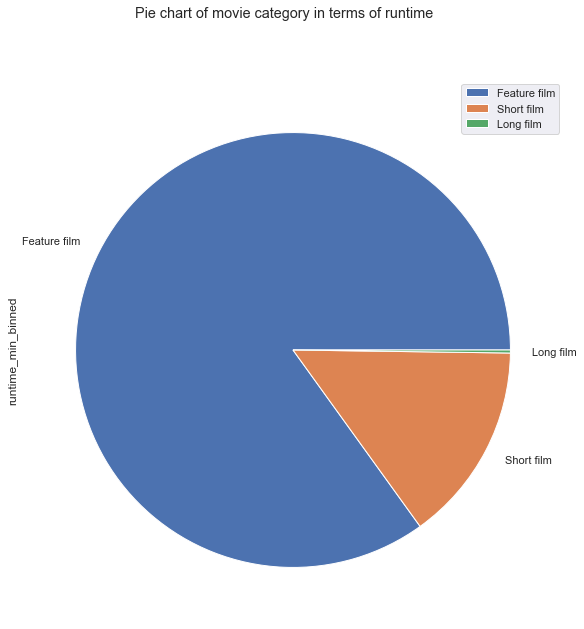

In [203]:
pd.DataFrame(imdb_titles['runtime_min_binned'].value_counts()).plot(kind='pie',subplots=True, figsize=(10,10),title='Pie chart of movie category in terms of runtime')

>**From above Piechart we observe that most of the movies from out dataset can be categorized as feature films. This are films that run for more than 60 minutes but less than 210 minutes. This is according to the Academy of Motion Picture Arts and Sciences, the American Film Institute, the British Film Institute and the Screen Actors Guild.**
___

>Looking at the genres column in the imdb_titles dataset, we notice that they have categorized each movie entry into genres but most values are a combination of all the genres that the movie falls into. We can split this string values and remain with the first genre as the main genre of the movie(row).

In [112]:
#New column with split values of the string values in the genre column.
imdb_titles['genre_main'] = imdb_titles['genres'].map(lambda x: x.split(',')[0])
imdb_titles.sample(15)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_min_binned,genre_main
96647,tt5640106,Jim Root: The Sound and the Story,Jim Root: The Sound and the Story,2014,304.0,Documentary,Long film,Documentary
58808,tt3421988,593 Vidas,593 Vidas,2013,87.0,Drama,Feature film,Drama
116659,tt6936746,God Bliss Our Home,God Bliss Our Home,2017,87.0,"Animation,Documentary",Feature film,Animation
84132,tt4862056,Us,Us,2015,75.0,Comedy,Feature film,Comedy
103512,tt6064602,The 2 of Us,The 2 of Us,2016,30.0,"Biography,Documentary,Music",Short film,Biography
86856,tt5039912,Thirst for love,Thirst for love,2015,108.0,"Crime,Drama,Fantasy",Feature film,Crime
36910,tt2342266,Orion,Orion,2015,110.0,"Action,Drama,Fantasy",Feature film,Action
88299,tt5124082,Heartstrings,Le coeur en braille,2016,85.0,"Comedy,Drama",Feature film,Comedy
30392,tt2156927,País do Desejo,País do Desejo,2012,87.0,Drama,Feature film,Drama
111124,tt6488870,East of Sweden,Kääntöpiste,2018,104.0,"Drama,Thriller",Feature film,Drama


<AxesSubplot:title={'center':'Bar plot of value_counts of thr main genres'}>

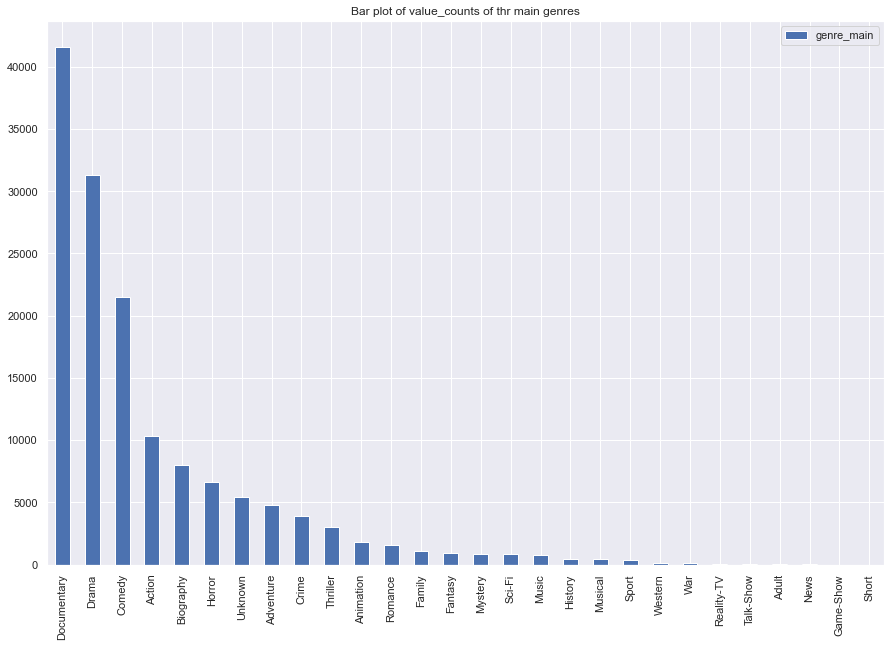

In [202]:
#Bargraph of value_counts of the genre_main column
pd.DataFrame(imdb_titles['genre_main'].value_counts()).plot(kind='bar',figsize=(15,10), title='Bar plot of value_counts of thr main genres')

>**We can observe that the highest no. of films created during the time our dataset was aggregated, were documentaries.**
___

## Merging our datasets

In [128]:
#We merger our datasets in order to get all the movies information in one dataset. Our merged dataset will have less entries 
#since the imdb_ratings dataset has less entries compared to the imdb_titles dataset.
imdb_merged = imdb_titles.merge(imdb_ratings, on='tconst')
imdb_merged.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_min_binned,genre_main,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Feature film,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Feature film,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Feature film,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",Feature film,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Feature film,Comedy,6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",Feature film,Horror,4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Feature film,Adventure,8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,Feature film,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,Feature film,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,Feature film,Documentary,7.6,53


## Exploratory Data Analysis

<AxesSubplot:title={'center':'Bar graph of average rating against genres'}, xlabel='genre_main', ylabel='median averagerating'>

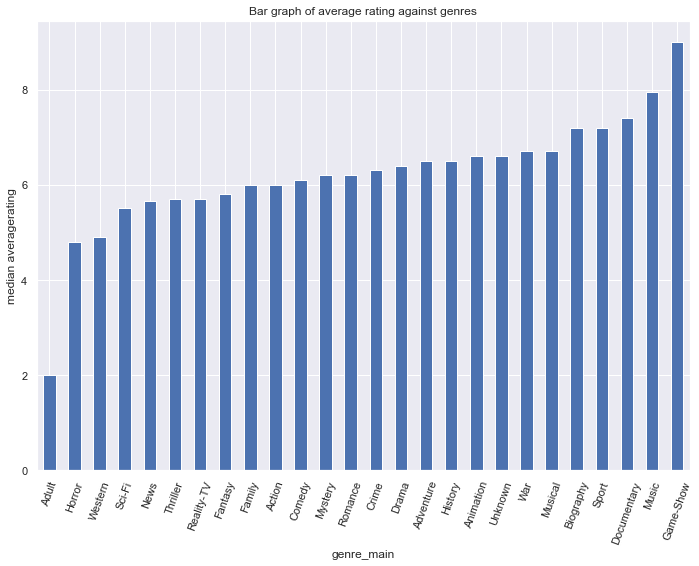

In [204]:
#bar graph of averege rating against the main genres in the imdb dataset
imdb_merged.groupby('genre_main')['averagerating'].median().sort_values().plot(kind='bar', ylabel='median averagerating', rot=70, title='Bar graph of average rating against genres')

___

<AxesSubplot:xlabel='runtime_min_binned', ylabel='median averagerating'>

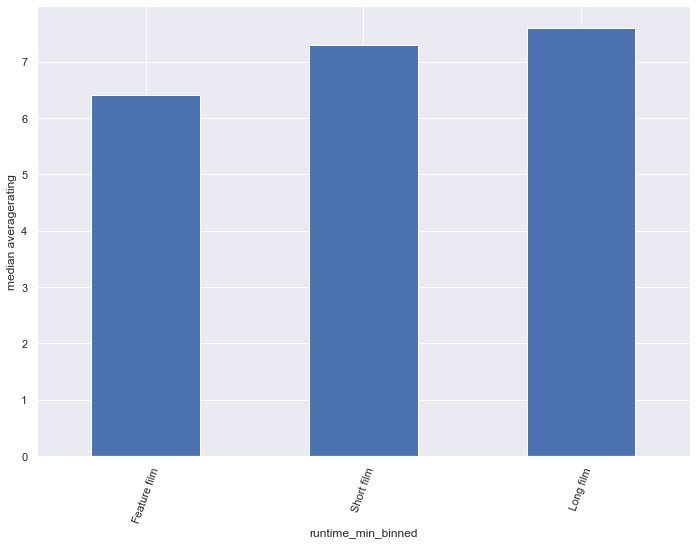

In [182]:
imdb_merged.groupby('runtime_min_binned')['averagerating'].median().sort_values().plot(kind='bar',ylabel='median averagerating',rot=70)

>**From above bar graph, we observe that the longer films have a higher ratings than the other 2 categories of movies.**

<AxesSubplot:title={'center':'Number of votes against main genre'}, xlabel='genre_main', ylabel='number of vote'>

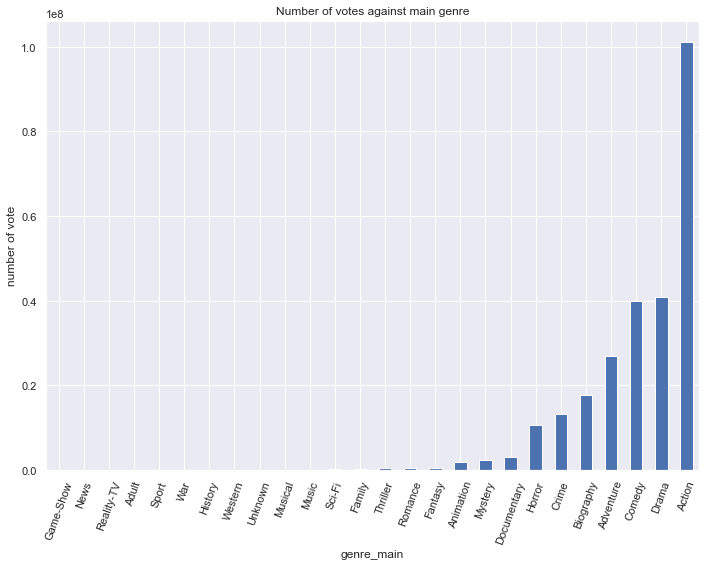

In [209]:
imdb_merged.groupby('genre_main')['numvotes'].sum().sort_values().plot(kind='bar',ylabel='number of vote',rot=70,title='Number of votes against main genre')

# Loading Second Dataset

In [169]:
bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Understanding

In [170]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


>**We observe that the dataset has 3387 rows and 5 columns. the data structure of the dataset is off, since the datatye of the foreign_gross column is object. We also have null values in the studio, domestric_gross and foreign_gross columns.**
___

## Data Cleaning

#### Changing the datatype of the foreign_gross column

In [173]:
#Converting the datatype of the foreign_gross column to float.
bom_gross['foreign_gross'] = pd.to_numeric(bom_gross['foreign_gross'],errors='coerce')

In [177]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


>**Data type of the foreign_gross column is now float.**
___

### Dealing with the Null values

In [178]:
#Replacing the null values in the domestic_gross and foreign_gross columns
bom_gross['domestic_gross'].fillna(bom_gross['domestic_gross'].median(), inplace=True)
bom_gross['foreign_gross'].fillna(bom_gross['foreign_gross'].median(), inplace=True)

In [179]:
#Dropping the rows with null values in the studio column.
bom_gross.dropna(inplace=True)

In [180]:
#Checking the dataset after data cleaning
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [181]:
#Checking sum of null values for each column.
bom_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

>**We have dealt with all null values in our dataset.**
___

<ipython-input-201-9c242bf2f15c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bom_gross.groupby('year')['domestic_gross','foreign_gross'].mean().plot(kind='bar',figsize=(15,9),rot=70,ylabel='gross_revenue')


<AxesSubplot:xlabel='year', ylabel='gross_revenue'>

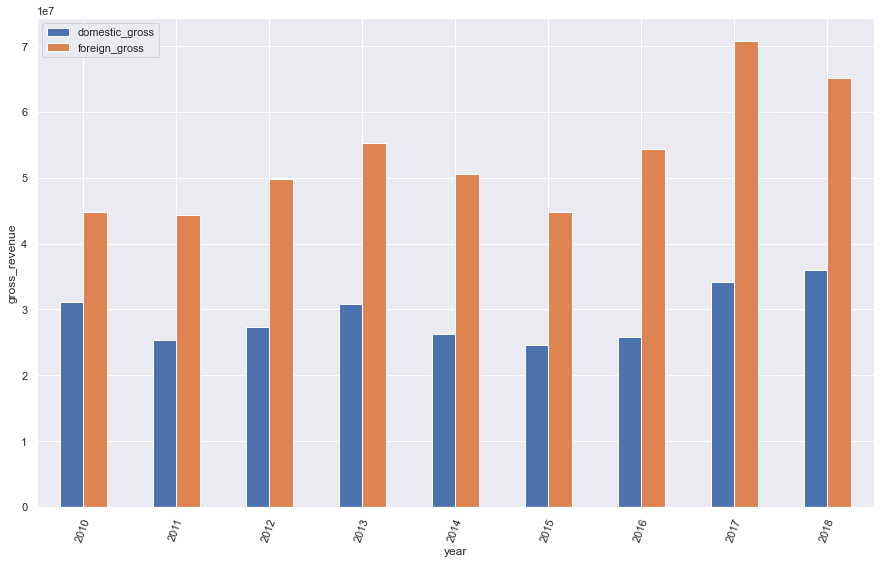

In [201]:
#
bom_gross.groupby('year')['domestic_gross','foreign_gross'].mean().plot(kind='bar',figsize=(15,9),rot=70,ylabel='gross_revenue')

>**From above bar graph, we observe that over the years that the gross revenue information was collected, foreign gross revenue was always higher than domestic gross revenue.**

Text(0.5, 1.0, 'Scatter plot of foreign_gross revenue against domestic_gross revenue')

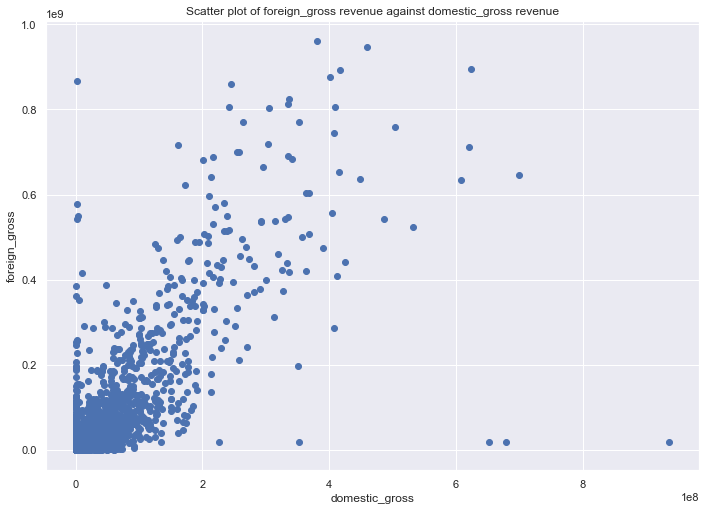

In [207]:
#Scatter plot of domestic_gross revenue against foreign gross revenue.
x = bom_gross['domestic_gross']
y = bom_gross['foreign_gross']
plt.scatter(x,y)
plt.xlabel('domestic_gross')
plt.ylabel('foreign_gross')
plt.title('Scatter plot of foreign_gross revenue against domestic_gross revenue')

In [200]:
#Correlation coeff of domestic gross revenue and foreign gross revenue.
bom_gross['domestic_gross'].corr(bom_gross['foreign_gross'])

0.7860752222766418

>**We are able to observe that the domestic and foreign gross domestic revenues have stron positive correlation which is also supported by the correlation coefficient calculated above. Therefore the more the domestic gross increases, the foreign gross revenue also inreases.**
___

# Conclusions

This analysis leads to three recommendations that will help the head of the new Microsoft movie studio decide what films to create.
>* **They should focus on creating long films. These are films with run times greater than 210 minutes.From our analysis, this type of film had the highest average ratings therefore meaning that the consumers of the subject films really enjoyed them.**
>* **As much as the foreign market brings in more gross revenue from the films, they should try focus their resources in both markets. This is beacause of the strong positive correlation between the gross revenues of the two markets. Also, they should create films that really capture auduinces from both markets since. The gross revnues in the two markets might have huge differences but we have to put into consideration that the foreign market is very large compared to the domestic one, hence the disparity.**
>* **As much as we observe that from average ratings, the longer films are higly rated, from the number of votes, we see that the feature films(60mins < runtime < 210mins) are have the highest number of vote. This translates to more people watching the subject films. Therefore the should also focus on this feature films since they have a large audience hence more people watching.**

## Future Plans
> We plan to use updated data in order to also provide updated insights to head of Micrsoft's new movie studio.